# A Look at the Top Soccer Leagues

In this project I am going to look at some statistics using soccer data. The statistics are mainly of two kinds. In the first part, I ask the following questions: 

### (1) What is the relation between a team's possession and that team's number of shots? 

### (2) What is the relation between the total number of fouls committed in a game versus the total number of shots in a game?

### (3) What is the relation between the number of fouls committed by a team and that team's number of shots?

### (4) Finally, what is the relation between the number of fouls committed by an opposing team and that team's number of shots?

In the second part, I look at some individual statistics: the user chooses a league and season, and I answer the following questions: 

### (1) Who are the highest scorers? 

### (2) Who committed most fouls?

### (3) Who was fouled the most? 

### (4) How are all the season's goal times distributed throughout the game?

Because the data I need for these statistics is available only for two seasons (2014/2015 and 2015/2016) I just focus on these seasons. Also, I restrict the study to the top five European leagues: *Premier League* (England), *Bundesliga* (Germany), *Ligue 1* (France), *La Liga* (Spain), and *Serie A* (Italy).

One more general observation: a lot of the relevant data for my study was stored in xml format, so I used a [library](https://pypi.org/project/xmltodict/) that converts from xml format to dictionary format.

Let's begin. More comments on individual steps can be found below. 

First, I use an SQL query to extract the relevant data from the soccer database, and then I save this in a csv file. 

In [8]:
import csv

import sqlite3 as sql

conn=sql.connect('database.sqlite')

c=conn.cursor()

query='''SELECT league_id, season, match_api_id, home_team_api_id,away_team_api_id,

        home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,possession

        FROM Match as m

        JOIN League as l

        ON l.id=m.league_id

        WHERE (m.season='2014/2015'

               OR m.season='2015/2016')

            AND (l.name LIKE 'England%'

                OR l.name LIKE 'Germany%'

                OR l.name LIKE 'Spain%'

                OR l.name LIKE 'France%'

                OR l.name LIKE 'Italy%');'''



with open('soccer_data.csv','a') as f:

    writer=csv.writer(f)

    writer.writerow(['league_id','season', 'match_id', 'home_team_id','away_team_id','home_team_goal','away_team_goal',
        'goal','shoton','shotoff','fouls','card','possession'])
    
    for row in c.execute(query):

        writer.writerow(row)

Next, I load the csv file into a dataframe:

In [9]:
import numpy as np
import pandas as pd

df=pd.read_csv('soccer_data.csv')

I make sure there are no duplicates in the dataframe. I also check for null values.

Finally, I display a few rows in the dataframe.

In [10]:
import numpy as np
import pandas as pd

print (df.duplicated().value_counts())
df.info()

False    3652
True     3651
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 13 columns):
league_id         7303 non-null object
season            7303 non-null object
match_id          7303 non-null object
home_team_id      7303 non-null object
away_team_id      7303 non-null object
home_team_goal    7303 non-null object
away_team_goal    7303 non-null object
goal              7303 non-null object
shoton            7303 non-null object
shotoff           7303 non-null object
fouls             7303 non-null object
card              7303 non-null object
possession        7303 non-null object
dtypes: object(13)
memory usage: 741.8+ KB


In [11]:
df.head(30)

,league_id,season,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,goal,shoton,shotoff,fouls,card,possession
0,1729,2014/2015,1723982,9825,9826,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>78</comment><event...
1,1729,2014/2015,1723983,8191,8455,1,3,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>35</comment><event...
2,1729,2014/2015,1723984,8197,8668,2,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>39</comment><event...
3,1729,2014/2015,1723985,8650,8466,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>70</comment><event...
4,1729,2014/2015,1723986,10260,10003,1,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>60</comment><event...
5,1729,2014/2015,1723987,10261,8456,0,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>41</comment><event...
6,1729,2014/2015,1723988,10172,8667,0,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>46</comment><event...
7,1729,2014/2015,1723989,10194,10252,0,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>57</comment><event...
8,1729,2014/2015,1723990,8659,8472,2,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>66</comment><event...
9,1729,2014/2015,1723991,8654,8586,0,1,<goal><value><comment>npm</comment><event_inci...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>r</comment><stats><rcard...,<possession><value><comment>38</comment><event...


I will now define some functions I  use to extract data from the xml expressions.

At this stage of the extraction process, I am interested in creating a table with data about the *game* (later on I create tables with data about the players). The table will have the following columns (new columns *in italics*:
league_id	
season
match_id
home_team_id
away_team_id
home_team_goal
away_team_goal
*home_team_fouls	
away_team_fouls	
home_team_shots	
away_team_shots	
home_team_possession
away_team_possession*

`get_fouls_team` takes a dataframe row as input and returns the number of home team and away team fouls. The reason we need to pass a row as an argument in this function is that we need the row number in order to identify the home and away teams.
`get_posesssion(xml_string)` takes an xml_string as input and it returns home and away team possession.
`get_event_team(event,row)` takes a type of event (*shoton* or *shotoff*) and returns event count for home and away teams.

There are three complications I need to deal with here, which stem from the way the data is stored in the dictionary (originally the xml format). 

(1) I need to deal with the case where a game contains no events of a certain type. This is taken care of with a conditional like `if dic[event]!=None:`

(2) The structure of the dictionary is different depending on whether a game has only one event of a certain type or multiple events of that type (one goal versus two or more; one shot on goal versus multiple shots on goal; etc). In the first case, `dic[event]['value']` identifies a dictionary, in the second case, `dic[event]['value']` identifies a list of dictionaries. I take care of these cases by converting the dictionary to a list with one dictionary as its elements (I use make_it_list function for this purpose).

(3) _The structure of the dictionaries for each particular event can vary slightly_. For example, a foul dictionary will record the team whose player fouled in 'team' key. But sometimes a foul is recorded in a dictionary and then it looks like the record is struck out (perhaps because the foul was recorded in error), so no team is mentioned. In this case, `dic[event]['value']['team']` will throw an error, since there is no `team` key. I deal with these cases by building `try-except KeyError` blocks. 

Keeping these three remarks in mind will make the following functions easier to read.

In [14]:
import xmltodict

def xml_to_dict(xml_string):
    return (xmltodict.parse(xml_string))

def make_it_list(d):
    if isinstance(d,dict):
        l=[]
        l.append(d)
        d=l
    return d


    
    


# #takes xml string, returns df with 'match_id', 'goal_time', 'home_team','scorer','type' columns
# def get_goal_times(xml_string):
#     dic=xml_to_dict(xml_string)

#     goals=[]

#     if dic['goal']!=None:
        
#         if isinstance(dic['goal']['value'],dict):
            
#             try:
#                 #i need this condition because some 'goal' entries are not really goals.
#                 #i was able to verify that using the test on the extracted values below.
#                 #the same test ensures i don't actually miss any real goals.
#                 if ('goals' in dic['goal']['value']['stats']) or ('penalties' in dic['goal']['value']['stats']) or ('owngoals' in dic['goal']['value']['stats']):
            
#                     goal_time=dic['goal']['value']['elapsed']

#                     goals.append(int(goal_time))
                    
#             except KeyError:
                
#                 pass
                
#         else:
#             for i in dic['goal']['value']:
#                 try:
#                     if ('goals' in i['stats']) or ('penalties' in i['stats']) or ('owngoals' in i['stats']):
#                         goals.append(int(i['elapsed']))
#                 except KeyError:
#                     pass
        
#     return goals

#takes row as input; returns foul count for home and away team
def get_fouls_team (row):
    dic=xml_to_dict(df.loc[row,'fouls'])
    home_team_fouls=0
    away_team_fouls=0
    
    for i in dic['foulcommit']['value']:
        try:
            if str(int(i['team']))==str(int(df.loc[row,'home_team_id'])):
                home_team_fouls+=1
            elif str(int(i['team']))==str(int(df.loc[row,'away_team_id'])):
                away_team_fouls+=1
        except KeyError:
            pass
    
    return home_team_fouls, away_team_fouls

#takes a type of event (as string) and a dataframe row
#returns two numbers: event count for home and away team
def get_event_team(event,row):
    xml_string=df.loc[row,event]
    dic=xml_to_dict(xml_string)
    away_team_events=0
    home_team_events=0
    there_are_events=(dic[event]!=None)
    
    if there_are_events:
        make_it_list(dic[event]['value'])
        
        for i in dic[event]['value']:
            try:
                if str(int(i['team']))==str(int(df.loc[row,'home_team_id'])):
                    home_team_events+=1
                else:
                    away_team_events+=1
            except KeyError:
                pass
    
    return home_team_events,away_team_events

#takes an xml string, returns home and away team possession
def get_possession(xml_string):    
    dic=xml_to_dict(xml_string)
    away_pos=0
    home_pos=0
    s=0
    
    for i in dic['possession']['value']:
        try:
            away_pos+=int(i['awaypos'])
            home_pos+=int(i['homepos'])
            s+=1
        except KeyError:
            pass
    
    away_pos=away_pos/s
    home_pos=home_pos/s
    
    return home_pos,away_pos

In [28]:
# print xml_to_dict(df.loc[14,'shoton'])
print ''
xml_to_dict(df.loc[11,'fouls'])['foulcommit']['value']
# df.head()

[OrderedDict([(u'stats', OrderedDict([(u'foulscommitted', u'1')])),
              (u'event_incident_typefk', u'37'),
              (u'coordinates', OrderedDict([(u'value', [u'6', u'16'])])),
              (u'elapsed', u'22'),
              (u'player2', u'37506'),
              (u'player1', u'29581'),
              (u'sortorder', u'0'),
              (u'team', u'10252'),
              (u'n', u'94'),
              (u'type', u'foulcommit'),
              (u'id', u'3904191')]),
 OrderedDict([(u'stats', OrderedDict([(u'foulscommitted', u'1')])),
              (u'event_incident_typefk', u'37'),
              (u'coordinates', OrderedDict([(u'value', [u'7', u'52'])])),
              (u'elapsed', u'22'),
              (u'player2', u'160448'),
              (u'player1', u'56972'),
              (u'sortorder', u'1'),
              (u'team', u'10252'),
              (u'n', u'96'),
              (u'type', u'foulcommit'),
              (u'id', u'3904202')]),
 OrderedDict([(u'stats', OrderedDict([(u'

Next, I update the dataframe by applying the previosuly defined functions to each row of the dataframe. **This will take some time** please be patient.

In [12]:
for i in range (df.shape[0]):
    df.loc[i,'home_team_fouls'],df.loc[i,'away_team_fouls']=get_fouls_team(i)
    home_shoton,away_shoton=get_event_team('shoton',i)
    home_shottoff,away_shotoff=get_event_team('shotoff',i)
    
    df.loc[i,'home_team_shots'],df.loc[i,'away_team_shots']=home_shoton+home_shottoff+
    df.loc[i,'home_team_goal'],
    away_shoton+away_shotoff+df.loc[i,'away_team_goal']   #updates shots columns
    
    df.loc[i,'home_team_possession'],df.loc[i,'away_team_possession']=get_possession(
    df.loc[i,'possession'])         #updates possession columns


In [14]:
df.head()

,league_id,season,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,goal,shoton,shotoff,fouls,card,possession,goal_times,home_team_fouls,away_team_fouls,home_team_shots,away_team_shots,home_team_possession,away_team_possession
0,1729,2014/2015,1723982,9825,9826,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>78</comment><event...,"[35, 45, 90]",12.0,19.0,14.0,4.0,76.0,24.0
1,1729,2014/2015,1723983,8191,8455,1,3,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>35</comment><event...,"[14, 17, 21, 34]",6.0,7.0,6.0,10.0,36.0,64.0
2,1729,2014/2015,1723984,8197,8668,2,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>39</comment><event...,"[20, 22, 45, 86]",16.0,10.0,10.0,13.0,37.0,63.0
3,1729,2014/2015,1723985,8650,8466,2,1,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>70</comment><event...,"[23, 56, 79]",8.0,14.0,11.0,10.0,60.0,39.0
4,1729,2014/2015,1723986,10260,10003,1,2,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<possession><value><comment>60</comment><event...,"[28, 53, 72]",14.0,20.0,14.0,6.0,59.0,40.0


I double check some of the changes I made. I make sure that the number of goals has the same length as the sum of home team goals and away team goals. And I make sure home team possession plus away team possession is 100 (possession is expressed in percentages). 

In [15]:
#rewrite this code to apply ot the new data format and move it where it needs to be.

#check to see if number of goals in 'goal_times' is equal to number of goals scored by home and away teams
criterion=df['home_team_goal']+df['away_team_goal']!=df['goal_times'].apply(lambda x:len(x))
df[criterion]     #prints anomalous rows

,league_id,season,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,goal,shoton,shotoff,fouls,card,possession,goal_times,home_team_fouls,away_team_fouls,home_team_shots,away_team_shots,home_team_possession,away_team_possession


In [16]:
#check to see if home and away possession adds up to around 100
criterion=(df['home_team_possession']+df['away_team_possession']<99) | (df['home_team_possession']+df['away_team_possession']>101) 

df[criterion].head()      #prints first five anomalous rows

,league_id,season,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,goal,shoton,shotoff,fouls,card,possession,goal_times,home_team_fouls,away_team_fouls,home_team_shots,away_team_shots,home_team_possession,away_team_possession


Next, I begin extracting player data. But before I do that, I need to extract goal information into a separate table. Since I want to extract a little bit more data about each goal, this wouldn't fit neatly into either the game dataframe or the player dataframe, so it wouldn't be a tidy way to store it.

The goal dataframe will have the following columns:

match_id
goal_time
team
scorer
assister
type

build a new dataframe which stores individual player data, called player_df. See below for player_df column names and their types.

In [ ]:
#for each goal in the dictionary, returns goal time, team, scorer, assist, goal type
def get_goal_attributes(goal_dictionary):
    if ('goals' in dic['goal']['value']['stats']):
        there_is_assist=('player2' in dic['goal']['value'])
        
        if there_is_assist:
            return goal_dictionary['elapsed'],goal_dictionary['team'],goal_dictionary['player1'],
            goal_dictionary['player2'],goal_dictionary['subtype']
        else:
            return goal_dictionary['elapsed'],goal_dictionary['team'],goal_dictionary['player1'],
            None,goal_dictionary['subtype']
    
    if ('penalties' in dic['goal']['value']['stats']):
        return goal_dictionary['elapsed'],goal_dictionary['team'],goal_dictionary['player1'],
        None,'penalty'
        
    if ('owngoals' in dic['goal']['value']['stats']):
        return goal_dictionary['elapsed'],goal_dictionary['team'],goal_dictionary['player1'],
        None,'own_goal'

#takes input values for goal_df variables, outputs updated goal_df (that is, adds a row to it)
# def add_goal_row(match_id,goal_time,scoring_team,scoring_player,assisting_player,goal_type):
    
    

#takes as input a dictionary of goals 
#for each goal, it adds match_id, goal time, scoring team, scoring player, and goal type to goal_df
#if 'comment' key is 'npm' or 'dg', i skip the record; it looks like these are errors 
#if they are included, there are more goals in the game than the score indicates
def add_goals_to_df(xml_string):
    dic=xml_to_dict(xml_string)
    there_are_no_goals=(dic['goal']==None)
    
    if there_are_no_goals:
        return goal_df
    
    goal_list=make_it_list(dic['goal']['value'])
    
    for dic in goal_list:
        if dic['goal']['value']['comment']!='npm' and dic['goal']['value']['comment']!='dg':
            time,team,scorer,assister,kind=get_goal_attributes(dic)
            add_goal_row(match_id,time,team,scorer,assister,kind)
    
    return goal_df

I now start building a player dataframe. Each row will be uniquely identified by the conjunction of the following columns:'league','season' ,'team', 'player_id'.

In addition, the dataframe will have the columns: 'shoton', 'shotoff', fouls_committed', 'fouls_suffered', and 'cards'.

In [ ]:
player_df=pd.DataFrame({'league':0,'season':'0','team':0,'player':0,'goals':([]),'shoton':0,'shotoff':0,'fouls_committed':0,
    'fouls_suffered':0,'card':([])})

player_df['league'].astype(object)
player_df['season'].astype(object)
player_df['team'].astype(object)
player_df['player'].astype(object)
player_df['shoton'].astype(int)
player_df['shotoff'].astype(int)
player_df['fouls_committed'].astype(int)
player_df['fouls_suffered'].astype(int)
player_df['card'].astype(object)   #i store cards in list containing card type

I build functions that will extract information from the original dataframe, and add it to the player dataframe. 

`update_player_fouls()` takes as input a df row and updates **player_df** 'fouls_committed' and 'fouls_suffered' columns. If a player P fouled or was fouled and P is not already in **player_df**, I add a row with the respective player's team, season and league. Then I update the two columns mentioned above. 

Just as before, I needed to deal with type (3) problems. For example, a foul dictionary lists the fouled player as _player2_ but some fouls are not suffered by any player in particular (a handball, or a dive) so there is no _player2_ listed. Just as above, I dealt with these cases using `try-except KeyError` blocks. 

For all other types of events I built the following two functions: 

`update_player_df(row,event)` deals with complications (1) and (2) above. 

Within this function, I apply `update_player(row,dic,event)` which first updates **player_df** with a new row if a player involved in the event is not already in **player_df**. And second, it updates the event column for the players involved in the event (adding a type of goal, for example).

Just as above, the `update_player` function needed to deal with slight variations in the structure of the event dictionary. For example, goal types are recored in 'subtype' key, but when the goal is scored from a penalty shoot, it is stored in a different key. As usual, I deal with these cases by introducing `try-except KeyError` blocks

In [ ]:
#takes a row, goes to foul column, and updates player_df fouls_committed and fouls_suffered columns
#analyzing the raw data, it looks like player1 commits the foul, while player2 suffers the foul
#(for example, a dive had only a player1)
#also, the only team listed is the one that commits the foul
def update_player_fouls(row):
    global player_df
    dic=xml_to_dict(df.loc[row,'fouls'])
    
    for foul in dic['foulcommit']['value']:
        league=int(df.loc[row,'league_id'])
        season=str(df.loc[row,'season'])
        
        try:
            team=int(foul['team'])
            player=int(foul['player1'])
            criterion=(player_df['league']==league) & (player_df['season']==season) & (
                player_df['team']==team) & (player_df['player']==player)

            if player_df[criterion].empty:       #tests to see if i need another row
                temp_df=pd.DataFrame([{'league':league,'season':season,'team':team,'player':player,
                                       'goal':[],'shoton':0,'shotoff':0,'fouls_committed':0,
                                       'fouls_suffered':0,'card':[]}])
                player_df=pd.concat([player_df,temp_df],ignore_index=True)    #adds new row
            criterion=(player_df['league']==league) & (player_df['season']==season) & (
            player_df['team']==team) & (player_df['player']==player)
            i=player_df.index[criterion].tolist()[0]
            player_df.loc[i,'fouls_committed']+=1

        except KeyError:
            pass

        try:
            player=int(foul['player2'])
            team=({int(df.loc[row,'home_team_id']),int(df.loc[row,'away_team_id'])}-{int(foul['team'])}).pop()
            criterion=(player_df['league']==league) & (player_df['season']==season) & (
                player_df['team']==team) & (player_df['player']==player)

            if player_df[criterion].empty:    #tests to see if i need another row
                temp_df=pd.DataFrame([{'league':league,'season':season,'team':team,'player':player,
                                       'goal':[],'shoton':0,'shotoff':0,'fouls_committed':0,
                                       'fouls_suffered':0,'card':[]}])
                player_df=pd.concat([player_df,temp_df],ignore_index=True)    #adds new row
            criterion=(player_df['league']==league) & (player_df['season']==season) & (
            player_df['team']==team) & (player_df['player']==player)
            i=player_df.index[criterion].tolist()[0]
            player_df.loc[i,'fouls_suffered']+=1

        except KeyError:
            pass
        

def update_player(row,dic,event):
    global player_df
    league=int(df.loc[row,'league_id'])
    season=str(df.loc[row,'season'])

    try:
        team=int(dic['team'])
        player=int(dic['player1'])
        criterion=(player_df['league']==league) & (player_df['season']==season) & (
            player_df['team']==team) & (player_df['player']==player)

        if player_df[criterion].empty:
            temp_df=pd.DataFrame([{'league':league,'season':season,'team':team,'player':player,
                                   'goal':[],'shoton':0,'shotoff':0,'fouls_committed':0,
                                   'fouls_suffered':0,'card':[]}])
            player_df=pd.concat([player_df,temp_df],ignore_index=True)

        criterion=(player_df['league']==league) & (player_df['season']==season) & (
            player_df['team']==team) & (player_df['player']==player)

        if event in ['shoton','shotoff']:
            i=player_df.index[criterion].tolist()[0]
            player_df.loc[i,event]+=1

        elif event=='card':
            i=player_df.index[criterion].tolist()[0]
            player_df.loc[i,event].append(dic['card_type'])

    except KeyError:
        pass


def update_player_df(row,event):
    global player_df
    dic=xmltodict.parse(df.loc[row,event])
    dic[event]['value']=make_it_list(dic[event]['value'])
    there_is_event=(dic[event]!=None)
    
    if there_is_event:
            for element in dic[event]['value']:
                update_player(row,element,event)
                

Next, I call the functions to populate the player dataframe. **This will take a long time to execute.** Please be patient.

In [ ]:
for i in range(df.shape[0]):
    update_player_fouls(i)
    update_player_df(i,'shoton')
    update_player_df(i,'shotoff')
    update_player_df(i,'card')

I save player_df to a .csv file

In [ ]:
# def get_penalties(row):

#     s=0

#     for i in row['goal']:

#         if i=='penalty':

#             s+=1

#     return s


# def get_non_penalties(row):

#     return len(row['goal'])-row['penalties']


# def get_goals(row):
    
#     return len(row['goal'])


# player_df['goals']=player_df.apply(get_goals,axis=1)

# player_df['penalties']=player_df.apply(get_penalties, axis=1)

# player_df['non_penalties']=player_df.apply(get_non_penalties,axis=1)


player_df.to_csv('player_data.csv')

This completes the first part of the project. In the second part, I focus on some exploratory data analysis. As I mentioned at the outset, I first look at the relationship between (1) possession versus number of shots and (2) the number of fouls committed in a game versus the number of shots in a game.

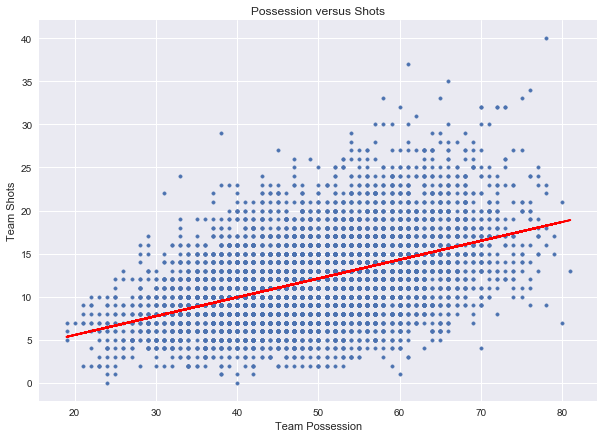

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn
import numpy as np

from numpy.polynomial.polynomial import polyfit

x=df['away_team_possession'].append(df['home_team_possession'])

y=df['away_team_shots'].append(df['home_team_shots'])

def scatter(x,y,title,xlabel,ylabel):
    b, m = polyfit(x, y, 1)
    
    plt.figure(figsize=(10,7))

    plt.plot(x, b + m * x, '-',color='red')

    plt.scatter(x,y, marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
scatter(x,y,'Possession versus Shots','Team Possession','Team Shots')

I calculate p-value and correlation coefficient for the relationship:

In [18]:
import statsmodels.api as sm

def stats(x,y):
    x=sm.add_constant(x)
    results=sm.OLS(y,x).fit()

    return results.summary()
    
stats(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1967.
Date:                Mon, 17 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:26:12   Log-Likelihood:                -21100.
No. Observations:                7302   AIC:                         4.220e+04
Df Residuals:                    7300   BIC:                         4.222e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1893      0.250      4.761      0.000         0.700     1.679
None           0.2186      0.005     44.354      0.000         0.209     0.228
==============================================================================
Omnibus:                      329.349   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.972
Skew:                           0.496   Prob(JB):                     1.71e-86
Kurtosis:                       3.560   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I turn now to the relationship between the number of fouls committed in a game and the number of shots in a game. First, i look at the _total_ number of fouls versus _total_ number of shots. 

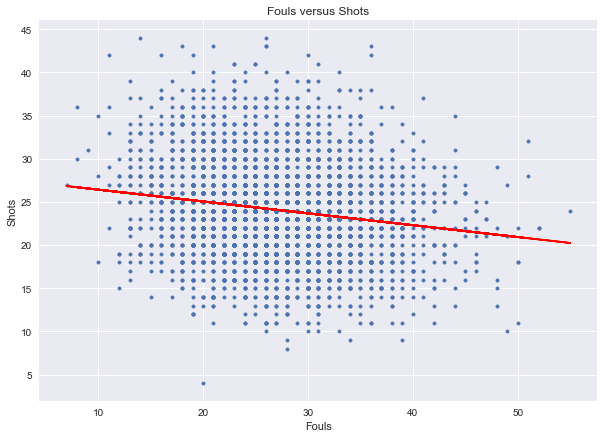

In [19]:
x=df['away_team_fouls']+df['home_team_fouls']

y=df['away_team_shots']+df['home_team_shots']

scatter(x,y,'Fouls versus Shots','Fouls','Shots')

In [20]:
stats(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     99.71
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           3.49e-23
Time:                        20:26:23   Log-Likelihood:                -11495.
No. Observations:                3651   AIC:                         2.299e+04
Df Residuals:                    3649   BIC:                         2.301e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         27.7956      0.384     72.295      0.000        27.042    28.549
None          -0.1373      0.014     -9.986      0.000        -0.164    -0.110
==============================================================================
Omnibus:                       43.324   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.673
Skew:                           0.271   Prob(JB):                     1.99e-10
Kurtosis:                       3.008   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, I look at the relation between a team's number of fouls committed versus its number of shots. 

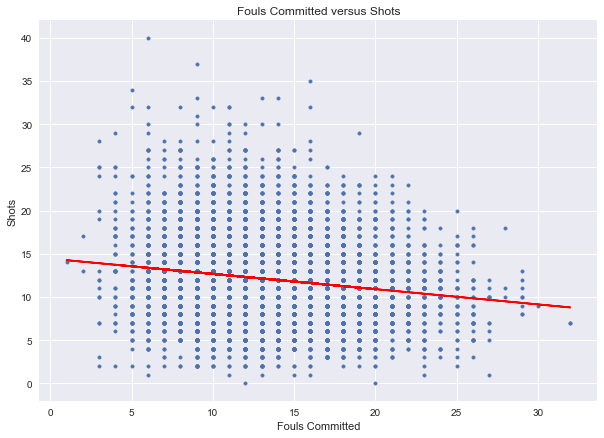

In [21]:
x=pd.concat([df['away_team_fouls'],df['home_team_fouls']],ignore_index=True)

y=pd.concat([df['away_team_shots'],df['home_team_shots']],ignore_index=True)

scatter(x,y,'Fouls Committed versus Shots','Fouls Committed','Shots')

In [22]:
stats(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           3.58e-41
Time:                        20:26:35   Log-Likelihood:                -21881.
No. Observations:                7302   AIC:                         4.377e+04
Df Residuals:                    7300   BIC:                         4.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.4288      0.186     77.644      0.000        14.065    14.793
None          -0.1765      0.013    -13.523      0.000        -0.202    -0.151
==============================================================================
Omnibus:                      454.898   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.044
Skew:                           0.604   Prob(JB):                    7.38e-124
Kurtosis:                       3.636   Cond. No.                         46.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, I look at the relation between a team's number of fouls _suffered_ versus its number of shots.

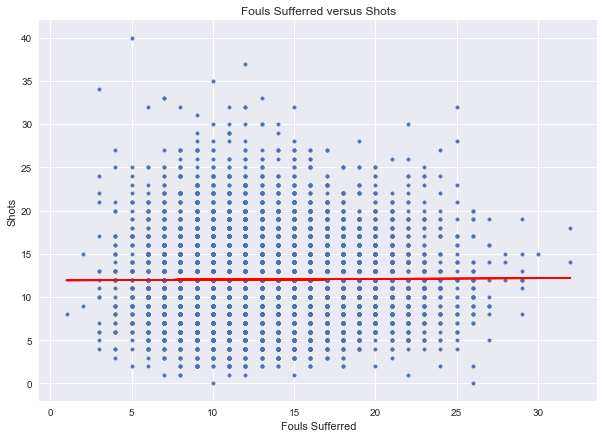

In [23]:
x=df['away_team_fouls'].append(df['home_team_fouls'])

y=df['home_team_shots'].append(df['away_team_shots'])

scatter(x,y,'Fouls Sufferred versus Shots','Fouls Sufferred','Shots')

In [24]:
stats(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4484
Date:                Mon, 17 Sep 2018   Prob (F-statistic):              0.503
Time:                        20:26:46   Log-Likelihood:                -21971.
No. Observations:                7302   AIC:                         4.395e+04
Df Residuals:                    7300   BIC:                         4.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         11.9156      0.188     63.334      0.000        11.547    12.284
None           0.0088      0.013      0.670      0.503        -0.017     0.035
==============================================================================
Omnibus:                      542.093   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.051
Skew:                           0.665   Prob(JB):                    1.31e-153
Kurtosis:                       3.739   Cond. No.                         46.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unfortunately, none of the relationships investigated are strongly correlated. Furthermore, for the last relationship we should not reject the null hypothesis that there is no correlation whatsoever between the two variables (because the p-value in this last case is higher than .05).

Next, I use a league and season of the user's choice, and I show the top goalscorers, top foulers, and players who suffered most fouls. First I get user input:

In [25]:
def get_filters():

    league=raw_input ('Please choose a league (valid choices: England, Germany, France, Spain, or Italy):')

    while league not in ['England', 'Germany','France', 'Spain', 'Italy']:

        league=raw_input('That is not a valid choice. Please re-enter league:')
        
    league_dict={'England': 1729,
                    'Germany': 7809,
                    'Spain': 21518,
                    'France': 4769,
                    'Italy': 10257}
    
    league_code=league_dict[league]
    
    season=raw_input ('Please enter season (2014/2015 or 2015/2016):')

    while season not in ['2014/2015', '2015/2016']:

        season=raw_input ('That is not a valid choice. Please re-enter season:')
        
    return league_code, season

league,season=get_filters()

Please choose a league (valid choices: England, Germany, France, Spain, or Italy):Germany
Please enter season (2014/2015 or 2015/2016):2015-2016
That is not a valid choice. Please re-enter season:2015/2016


In [ ]:
Below are some self-explanatory statistics:

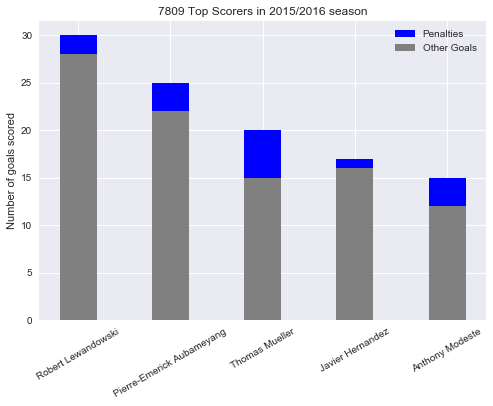

In [26]:
connection=sql.connect('database.sqlite')
cursor=connection.cursor()

criterion=(player_df['league']==league) & (player_df['season']==season)
top_scorers_df=player_df[criterion].sort_values('goals',ascending=False).head()

for i in top_scorers_df.index:
    
    player=top_scorers_df.loc[i,'player']
        
    cursor.execute('SELECT player_name FROM Player WHERE player_api_id={}'.format(player))
    
    top_scorers_df.loc[i,'player']=cursor.fetchall()[0][0]    
    
pos=np.arange(5)

plt.bar(pos,top_scorers_df['penalties'], color='blue',width=.4,bottom=top_scorers_df['non_penalties'],tick_label=top_scorers_df['player'])

plt.bar(pos,top_scorers_df['non_penalties'],color='grey',width=.4,tick_label=top_scorers_df['player'])

plt.xticks(rotation=30)
plt.legend(['Penalties','Other Goals'])
plt.title('{} Top Scorers in {} season'.format(league,season))
plt.ylabel('Number of goals scored')

plt.show()

I next show players who fouled the most:

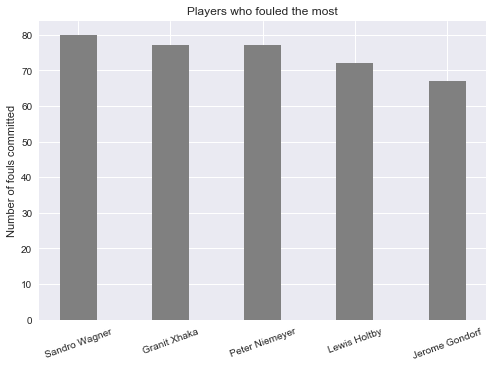

In [27]:
top_foulers_df=player_df[criterion].sort_values('fouls_committed',ascending=False).head()

for i in top_foulers_df.index:
    
    player=top_foulers_df.loc[i,'player']
    
    cursor.execute('SELECT player_name FROM Player WHERE player_api_id={}'.format(player))
    
    top_foulers_df.loc[i,'player']=cursor.fetchall()[0][0]
    
pos=np.arange(5)

plt.bar(pos,top_foulers_df['fouls_committed'],color='grey',width=.4,tick_label=top_foulers_df['player'])

plt.xticks(rotation=20)
plt.title('Players who fouled the most')
plt.ylabel('Number of fouls committed')
plt.show()

Below are the most fouled players:

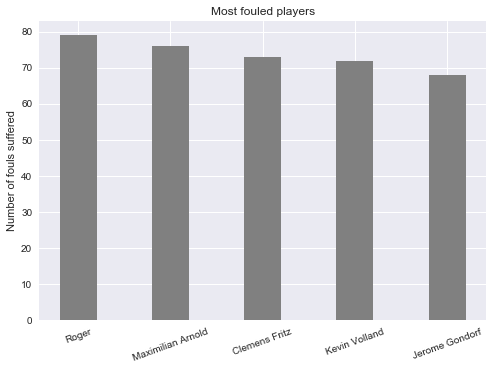

In [28]:
most_fouled_df=player_df[criterion].sort_values('fouls_suffered',ascending=False).head()

for i in most_fouled_df.index:
    
    player=most_fouled_df.loc[i,'player']
    
    cursor.execute('SELECT player_name FROM Player WHERE player_api_id={}'.format(player))
    
    most_fouled_df.loc[i,'player']=cursor.fetchall()[0][0]
    
pos=np.arange(5)

plt.bar(pos,most_fouled_df['fouls_suffered'],color='grey',width=.4,tick_label=most_fouled_df['player'])

plt.xticks(rotation=20)
plt.title('Most fouled players')
plt.ylabel('Number of fouls suffered')
plt.show()

Finally, I show the distribution of goals throughout the 90 minutes of the soccer games. Not surprisingly, most goals will be scored at the end of the two halves (since there is time added so technically the bins are not of the same size. Unfortunately, there is no way to correct for this given the data we have).

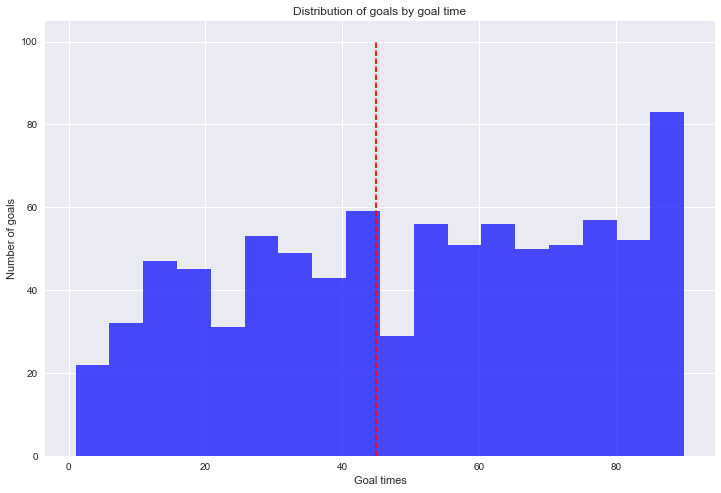

In [29]:
criterion=(df['league_id']==league) & (df['season']==season)
# df.head()
filtered_df=df[criterion]
filtered_df=filtered_df.reset_index(drop=True)
filtered_df.head()
goal_list=[]

for row in range(filtered_df.shape[0]):
    
    for goal in filtered_df.loc[row,'goal_times']:
        
        goal_list.append(goal)
    
goal_list=np.asarray(goal_list)
# print goal_list
plt.figure(figsize=(12,8))

plt.hist(goal_list,18,facecolor='blue',alpha=.7)

plt.xlabel('Goal times')
plt.ylabel('Number of goals')
plt.title('Distribution of goals by goal time')
plt.vlines(45,0,100,color='red',linestyle='dashed',label='Half')